In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

theta_values = []
omega_values = []
new_theta_values = []
new_omega_values = []

#runge kutta 4th order

# theta dot
def f(t, theta, omega):
    return omega

# theta double dot
def g(t, omega, theta):

    B = 0.25
    l = 0.1
    m = 0.1
    grav = 9.8
    A = 1
    alpha = 12 / 16 * np.sqrt(grav/l)
    return 1 / (m * l) * (-B * l * omega - m * grav * np.sin (theta) + A * np.cos (alpha * t))
      
def rk4(t0, theta0, omega0, steps, dt, n):
    t = t0
    theta = theta0
    omega = omega0
    count = 0
    count2 = 0
    
    while 1500 > count2 and t < 200:
        
        k = (t-dt)/n
        

        if round(k, 4) - round(k) == 0.0 :  
            theta_values.append(theta)
            omega_values.append(omega)
            count2 += 1
        
        k1 = f(t, theta, omega)
        l1 = g(t, omega, theta)
        
        k2 = f(t + dt / 2, theta + k1 * dt / 2, omega + l1 * dt / 2)
        l2 = g(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        
        k3 = f(t + dt / 2, theta + k2 * dt / 2, omega + l2 * dt / 2)
        l3 = g(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        
        k4 = f(t + dt, theta + k3 * dt, omega + l3 * dt)
        l4 = g(t + dt, omega + l3 * dt, theta + k3 * dt)
        
        theta = theta + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        omega = omega + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)

        count += 1
        t += dt
    
    print(count)
    print(count2)
    
    for i in range(len(theta_values) - 1):
        new_theta_values.append(theta_values[i] + (theta_values[i+1] - theta_values[i]) / 2)
        new_omega_values.append(omega_values[i] + (omega_values[i+1] - omega_values[i]) / 2)
    for i in range(len(new_theta_values)):
        new_theta_values[i] = new_theta_values[i]%(2*3.14)    

        
    plt.plot(new_theta_values,new_omega_values,'k.',markersize=2)
    plt.title('state space $\\beta = .25,$ $\\alpha = \\frac{3}{4}\sqrt{\\frac{g}{l}}$, $A = 1$')
    plt.xlabel('linear interpolated $\Theta$ modulus $2\pi$')
    plt.ylabel('linear interpolated $\omega$ (rad/s)')
    plt.savefig('Q2a_d.png')
    

        
t0 = 0
steps = 10000
theta0 = 3.0
omega0 = 0.1
dt = .05

l = 0.1
grav = 9.8
alpha = 12 / 16 * np.sqrt(grav/l)
n = round(1 / alpha,3)

theta0_list = [0.1, np.pi/4, np.pi/2, 3/4*np.pi, np.pi-.1, np.pi+.1, 5/4*np.pi, 3/2*np.pi, 7/4*np.pi, 2*np.pi-.1, 
               -np.pi, -np.pi, 3*np.pi, 3*np.pi] 
omega0_list = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 20, -13, -20]
#for i in range(len(theta0_list)):
#        rk4(t0, theta0_list[i], omega0_list[i], steps, dt, n)

rk4(t0, theta0_list[5], omega0_list[5], steps, dt,n)
print(n)
        


<IPython.core.display.Javascript object>


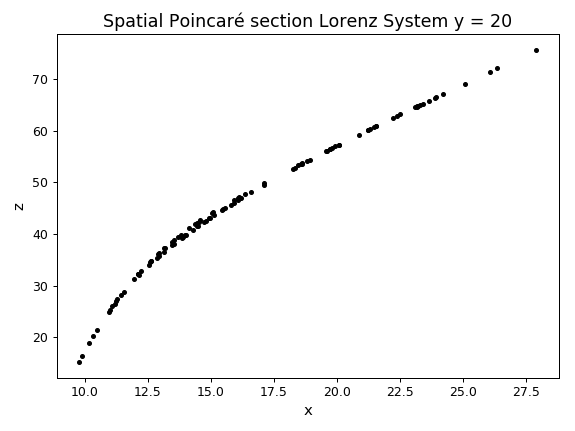

In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_values1 = []
y_values1 = []
z_values1 = []

#runge kutta 4th order

# x dot
def f(t, x, y, z):
    a = 16
    return a * (y - x) 

# y dot
def g(t, x, y, z):
    r = 50
    return r * x - y - x * z

# z dot
def h(t, x, y, z):
    b = 4
    return x * y - b * z

      
def rk4_adapt(t0, x0, y0, z0, steps, dt, tol):
    t = t0
    x = x0
    y = y0
    z = z0
    count = 0
    count2 = 0
    while steps > count :
        
        if round(y,2) == 20:
            x_values1.append(x)
            y_values1.append(y)
            z_values1.append(z)
        
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z = z + dt / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        
        count += 1
    '''
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter(x_values,y_values,z_values, c = 'k')
    plt.show()
    '''

    plt.plot(x_values1,z_values1,'k.')
    plt.title('Spatial Poincaré section Lorenz System y = 20', fontsize = 14)
    plt.xlabel('x', fontsize = 12)
    plt.ylabel('z', fontsize = 12)
    plt.tight_layout()
    plt.savefig('Q3a.png')
    
init = [-13, -12, 52]
t0 = 0
steps = 1000000
dt = .001
tol = .00001
rk4_adapt(t0, init[0], init[1], init[2], steps, dt, tol)


<IPython.core.display.Javascript object>


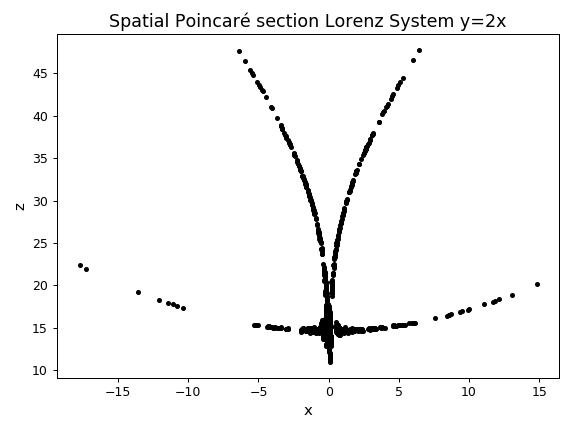

In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_values1 = []
y_values1 = []
z_values1 = []

#runge kutta 4th order

# x dot
def f(t, x, y, z):
    a = 16
    return a * (y - x) 

# y dot
def g(t, x, y, z):
    r = 50
    return r * x - y - x * z

# z dot
def h(t, x, y, z):
    b = 4
    return x * y - b * z

      
def rk4_adapt(t0, x0, y0, z0, steps, dt, tol):
    t = t0
    x = x0
    y = y0
    z = z0
    count = 0
    count2 = 0
    while steps > count :
        
        if round(y,2) == round(x*2,2):
            x_values1.append(x)
            y_values1.append(y)
            z_values1.append(z)
        
        k1 = f(t, x, y, z)
        l1 = g(t, x, y, z)
        m1 = h(t, x, y ,z)
        
        k2 = f(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        l2 = g(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
        m2 = h(t + dt / 2, x + k1 * dt / 2, y + l1 * dt / 2, z + m1 * dt / 2)
                
        k3 = f(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        l3 = g(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        m3 = h(t + dt / 2, x + k2 * dt / 2, y + l2 * dt / 2, z + m2 * dt / 2)
        
        k4 = f(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        l4 = g(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        m4 = h(t + dt, x + k3 * dt, y + l3 * dt, z + m3 * dt)
        
        x = x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y = y + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        z = z + dt / 6 * (m1 + 2 * m2 + 2 * m3 + m4)
        
        count += 1
    '''
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter(x_values,y_values,z_values, c = 'k')
    plt.show()
    '''
    #ax.plot(x, z, 'r+', zdir='y', zs=1.5)
    #ax.plot(y, z, 'g+', zdir='x', zs=-0.5)
    #ax.plot(x, y, 'k+', zdir='z', zs=-1.5)
    #plt.savefig('Q2a.png')
    plt.plot(x_values1,z_values1,'k.')
    plt.title('Spatial Poincaré section Lorenz System y=2x', fontsize = 14)
    plt.xlabel('x', fontsize = 12)
    plt.ylabel('z', fontsize = 12)
    plt.tight_layout()
    plt.savefig('Q3b.png')
    
init = [-13, -12, 52]
t0 = 0
steps = 800000
dt = .001
tol = .00001
rk4_adapt(t0, init[0], init[1], init[2], steps, dt, tol)
